# Part 2 - Summary Presentation of Propsper Loan data

# Summary of Prosper Loan Data

## by Michael Smales

## Introduction

* Propsper is a peer-to-peer lending service: borrowers advertize for a loan by creating a listing and investors can choose loans to fund 

* This presentation summarizes the compositions of Prosper's loans 

* This analysis is based 20k loans from 2012



## Reading in data and importing functions

### Gathering & Assessment

Import the data

In [2]:
# import main packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ipynb

%matplotlib inline

In [3]:
# import plotting functions written for pt1
import plot_functions as plt_fns

In [4]:
df_clean = pd.read_csv('./source_data/prosperLoanData_clean.csv')

In [5]:
df_clean.head()

,Unnamed: 0,listing_key,listing_creation_date,loan_origination_date,loan_original_amount,monthly_loan_payment,percent_funded,term,borrower_apr,prosper_rating_alpha,listing_category_numeric,listing_category_alpha
0,3,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,10000,321.45,1.0,36,0.12528,A,16,Motorcycle
1,10,0F123545674891886D9F106,2012-05-10 07:04:01.577000000,2012-05-17 00:00:00,13500,395.37,1.0,60,0.27462,C,1,Debt Consolidation
2,15,0F483544120452347F48121,2012-04-10 09:14:46.297000000,2012-04-19 00:00:00,4000,173.71,1.0,36,0.35797,HR,13,Household Expenses
3,30,0F57353904771934596FE9F,2012-01-30 17:59:17.200000000,2012-02-07 00:00:00,10000,322.62,1.0,36,0.12782,A,20,Wedding Loans
4,31,0F683558129866945165D36,2012-09-21 13:37:43.210000000,2012-09-27 00:00:00,2000,86.85,1.0,36,0.35797,HR,2,Home Improvement


## (Slide 1)



### Loan values range from \\$4-25k with right skew, and spikes around $5k multiples

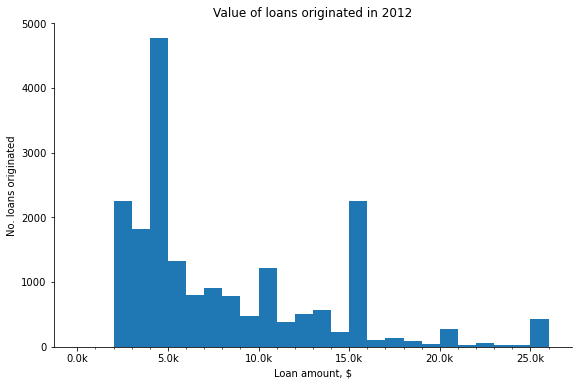

In [6]:
# plot loans originated in 2012
plt_fns.hist_plot(
    chart_data= df_clean['loan_original_amount'],
    xlabel='Loan amount, $',
    ylabel='No. loans originated',
    title='Value of loans originated in 2012',
    bin_step = 1000,
    maj_tick_step = 5000,
    min_tick_step = 1000
)

## (Slide 2)



### Loan APRs range from 6% to 36%, with a spike in the number of loans at the 33-36% level

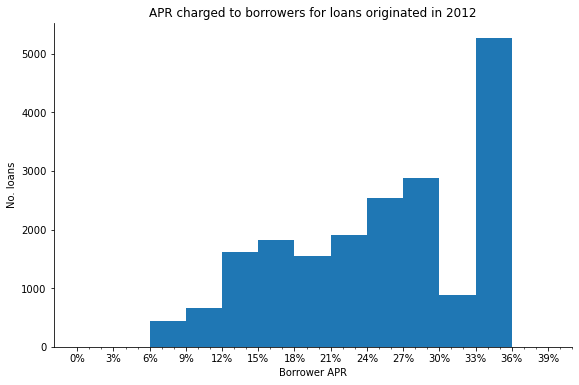

In [7]:
# plot apr charged for loans originated 2012
plt_fns.hist_plot(
    chart_data= df_clean['borrower_apr'],
    xlabel='Borrower APR',
    ylabel='No. loans',
    title='APR charged to borrowers for loans originated in 2012',
    bin_step = 0.03,
    maj_tick_step = 0.03,
    min_tick_step = 0.01
)

plt_fns.tick_format(axis='x', format_type='pct')

## (Slide 3)



### As loans become riskier, APRs increase the loan value cap is reduced from \\$25k to $4k

In [8]:
# set the risk rating order
rr_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

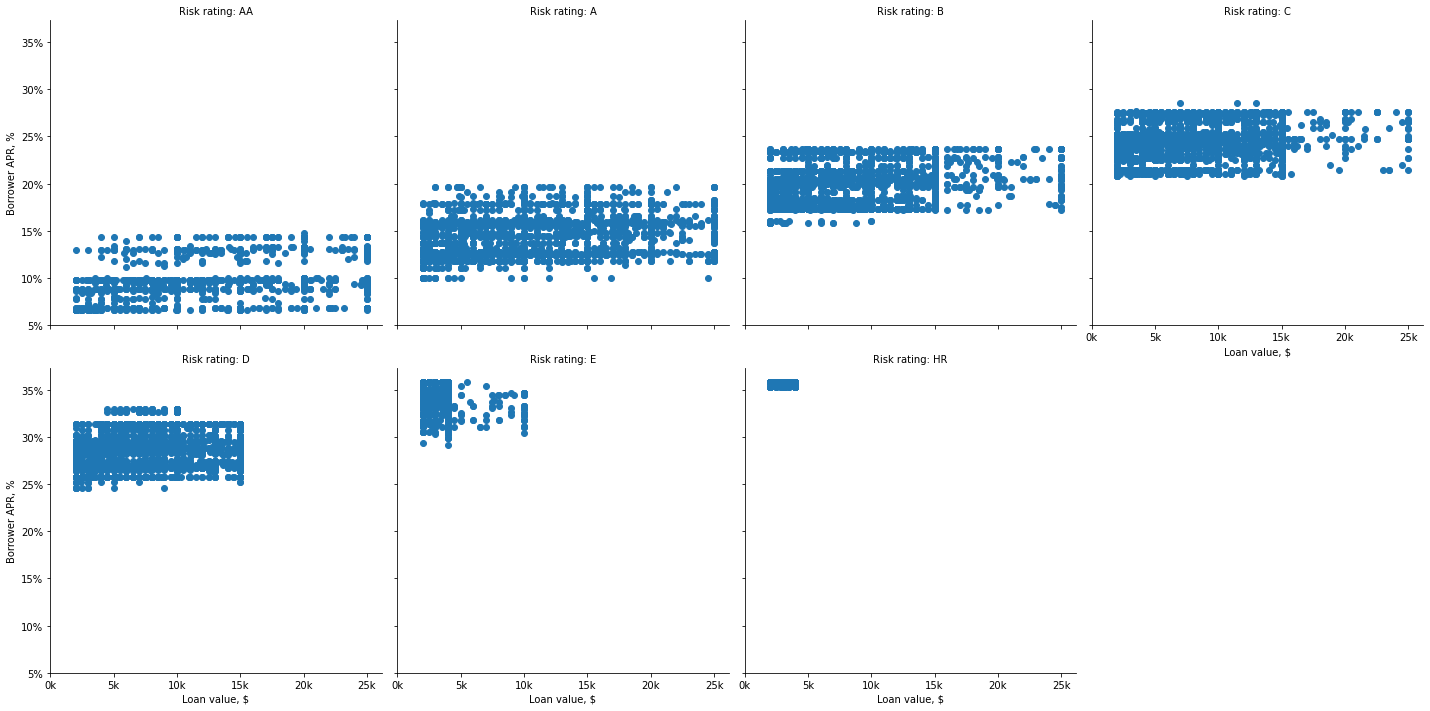

In [9]:
# try plotting this over 5 faceted histograms
g = sns.FacetGrid(data= df_clean, col = 'prosper_rating_alpha', col_order= rr_order, height=5, aspect=1, col_wrap=4, sharex=True, margin_titles=True); 
g.map(plt.scatter, 'loan_original_amount', 'borrower_apr');

# add titles and axis labels
g.set_xlabels('Loan value, $');
g.set_ylabels('Borrower APR, %');
g.set_titles(col_template="Risk rating: {col_name}");

# format x and y ticks
xticks = []
xticklabels = []
yticks = []
yticklabels = []
for i in range(0, 30000, 5000):
    xticks.append(i)
    xticklabels.append('{:.0f}k'.format(i/1000))
for i in range(5, 40, 5):
    yticks.append(i/100)
    yticklabels.append('{:.0f}%'.format(i))

g.set(
    xticks=xticks, 
    xticklabels=xticklabels
);
g.set(
    yticks=yticks, 
    yticklabels=yticklabels
);


## (Slide 4)

### 27% of Prosper's loan portfolio is highly concentrated on small, high-APR loans (i.e. <$5k loans with 33-36% APR)  

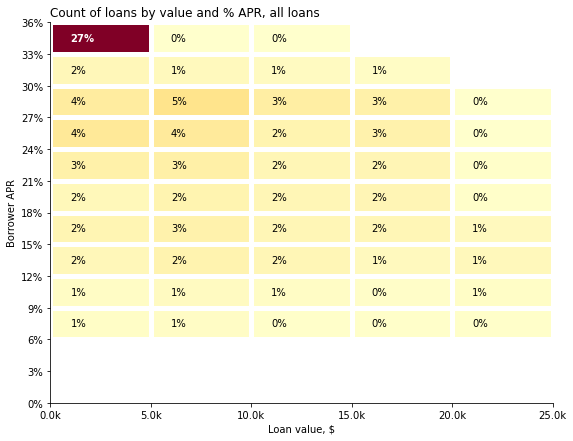

In [10]:
# plot relative count heatmap
plt_fns.count_heatmap_relative(
    data=df_clean,
    xrange = 'loan_original_amount',
    yrange= 'borrower_apr', 
    xlabel= 'Loan value, $', 
    ylabel= 'Borrower APR', 
    title= 'Count of loans by value and % APR, all loans', 
    xbin_step= 5000, 
    ybin_step = 0.03
)

## (Slide 5)



### The top 5 reason categories account for 80% of Prosper's loans, with 'debt consolidation' alone accounting for ~50%

In [11]:
# Create sort order for the bar chart
lc_order = df_clean['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = lc_order.values.tolist()

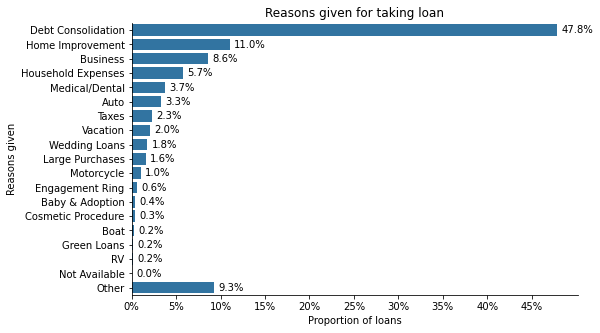

In [12]:
# create plot
plt_fns.rel_bar_chart(
    chart_data= df_clean['listing_category_alpha'], 
    xlabel= 'Proportion of loans', 
    ylabel= 'Reasons given', 
    title= 'Reasons given for taking loan', 
    plot_order=lc_order
)

## (Slide 6)



### Surprisingly, the debt consolidation category has the best loan risk profile among the top 5 categories 

In [13]:
# create a subset of the data for the top 5 categories which make up 80% of the loan volume
df_top_5 = df_clean[ \
    (df_clean['listing_category_alpha']=='Debt Consolidation') | \
    (df_clean['listing_category_alpha']=='Home Improvement') | \
    (df_clean['listing_category_alpha']=='Business') | \
    (df_clean['listing_category_alpha']=='Household Expenses') | \
    (df_clean['listing_category_alpha']=='Other') \
]

In [14]:
# redo listing category order
lc_order = df_top_5['listing_category_alpha'].value_counts().index
# Move 'Other' to the end - it is likely a mixture of miscellaneous categories 
lc_order = lc_order.drop('Other').union(['Other'], sort=False)
lc_order = list(lc_order.values)

In [15]:
# prepare the dataframe by creating a crosstab with the two categorical variables
ct_top_5 = pd.crosstab(index=df_top_5['listing_category_alpha'], columns=df_top_5['prosper_rating_alpha'], normalize='index')
#reorder coluns
ct_top_5 = ct_top_5.loc[:, rr_order]
#reorder rows
ct_top_5 = ct_top_5.loc[lc_order, :]
ct_top_5

prosper_rating_alpha,AA,A,B,C,D,E,HR
listing_category_alpha,,,,,,,
Debt Consolidation,0.079555,0.136976,0.173973,0.190547,0.166488,0.092921,0.159538
Home Improvement,0.041822,0.181227,0.138941,0.203996,0.163569,0.087825,0.182621
Business,0.041518,0.135231,0.126335,0.199881,0.188612,0.086595,0.221827
Household Expenses,0.017809,0.090828,0.129118,0.202137,0.171861,0.121104,0.267142
Other,0.023192,0.125345,0.124793,0.221977,0.167311,0.102154,0.235229


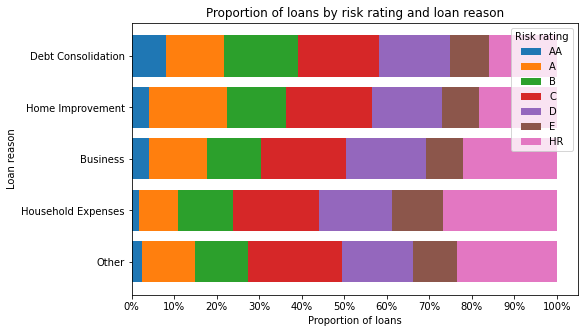

In [16]:

# plot 100% stacked bar
# set up y-coords
y_coords = np.arange(1, len(ct_top_5)+1, 1)

# set up coordinates for the base of each set of bars
lefts = np.zeros(5)

plt.figure(figsize=[8,5])

#plot each successive series, one on top of the other
for col in ct_top_5:
    plt.barh(y=y_coords, width=list(reversed(ct_top_5[col].values)), left=lefts, label=col);
    lefts = lefts + list(reversed(ct_top_5[col].values));

#set up xticks
x_tick_props = np.arange(0,1.1,0.1)
x_tick_names = ['{:0.0f}%'.format(v * 100) for v in x_tick_props]

#chart and axis labelling
plt.legend(title='Risk rating');
plt.xlabel('Proportion of loans');
plt.ylabel('Loan reason');
plt.title('Proportion of loans by risk rating and loan reason');
plt.yticks(ticks = y_coords, labels=reversed(ct_top_5.index));
ax = plt.gca();
ax.set_xticks(x_tick_props, labels=x_tick_names);
